<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Kidney Stone Prediction ✨</b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family: Georgia;">
    <span style="color: #008080;"> Author:</span> 
    <span style="color: black;">Deepanshu Verma .📄🖋️</span>
</h3>

<div align="center">
  <img src="https://www.cdi.org.in/wp-content/uploads/2021/05/kidney-stones-1200x675.jpg" alt="Image Description" width="1000px" height="450px">
</div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Introduction 🎬</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   
  
<h3 align="left"><font color=purple>📝 Project Objective:</font></h3><br> 

    
1. The primary objective of this project is to conduct a comprehensive analysis of kidney stone prediction, focusing on understanding the underlying factors that contribute to kidney stone formation and predicting the likelihood of kidney stone occurrence in patients.<br>
    
    
2. The project aims to analyze various urinary characteristics of patients in order to uncover patterns and insights related to kidney stone formation. By examining features such as urine gravity, pH, osmolality, conductivity, urea, and calcium levels, the goal is to gain a deeper understanding of the physiological factors associated with kidney stone risk.<br></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📝 Project Contents 📝</b></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<h3 align="left"><font color=brown>📊 Table of Contents:</font></h3><br>


1. <b>📚 Importing Libraries.</b><br>


2. <b>⏳ Loading Datasets.</b><br>
    
    
3. <b>🧠 Basic Understanding of Data. </b><br>
 
    
4. <b>📊 Exploratory Data Analysis (EDA)</b><br>
    
    
5. <b>💡 Feature Engineering.</b><br>

    
6. <b>📈 Statistical Analysis - Feature Importance.</b><br>
    
    
7. <b>⚙️ Data Preprocessing.</b><br>

    
8. <b>🎯 Model Creation and Evaluation.</b><br></div>

    
9. <b> 🎈 Conclusion.</b><br>

---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Importing Libraries 📚</b></div>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from scipy import stats

from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score


---

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Loading Datset ⏳</b></div>

In [9]:
df = pd.read_csv("kidney-stone-dataset.csv",index_col=[0])

In [11]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


----

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Basic Understanding of Data 🧠</b></div>

### 1. Checking the Dimensions of Dataset.

In [16]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 90
Total number of attributes/columns present in the dataset is: 7


---

### 2. Fetching the Attributes Names.

In [20]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
1. **Gravity:** It refers to **urine specific gravity,** which measures the concentration of dissolved substances in urine.<br>
    
2. **pH:** pH measures the **acidity or alkalinity of urine.**<br>

3. **Osmo (Osmolality):** Osmolality measures the **concentration of solutes (particles) in urine.**<br>
    
4. **Cond (Conductivity):** It measures the **ability of urine to conduct electricity**, which is influenced by the concentration of ions in the urine.<br>

5. **Urea:** Urea is a **waste product produced by the liver** as a result of protein metabolism.<br>
    
6. **Calc (Calcium):** Calcium is an important **mineral that plays a role in bone health, muscle function, and nerve transmission.**<br>
    
7. **Target:** This is likely your target variable, which represents the **presence or absence of kidney stones.**<br>

---

### 3. Assigning More Suitable Column Names for better Analysis.

In [25]:
df.rename(columns={"gravity":"Urine_Gravity","ph":"Urine_pH","osmo":"Osmolality","cond":"Conductivity","urea":"Urea",
                  "calc":"Calcium","target":"Target"},inplace=True)

----

### 4. Generating Basic Information of the data.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Urine_Gravity  90 non-null     float64
 1   Urine_pH       90 non-null     float64
 2   Osmolality     90 non-null     int64  
 3   Conductivity   90 non-null     float64
 4   Urea           90 non-null     int64  
 5   Calcium        90 non-null     float64
 6   Target         90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There is total **90 records** and **7 columns** availabe in the dataset.
* **Out of 7 columns** all of them are **numerical columns.**

---

### 5. Computing Total No. of Missing Values.

In [34]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Urine_Gravity,0
Urine_pH,0
Osmolality,0
Conductivity,0
Urea,0
Calcium,0
Target,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **None** of the columns is having **missing values.**
* So we **don't** have to perform **Data Imputation.**

---

### 6. Checking Duplicate Records.

In [39]:
df.duplicated().any()

False

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* There are **no duplicate records** present in the dataset.
* So we can say there is no **Data Lekage** in the dataset.

---

### 7. Performing Descriptive Statistical Analysis.

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Urine_Gravity,90.0,1.017952,0.006780,1.005,1.012258,1.018000,1.023000,1.034
Urine_pH,90.0,6.036651,0.711801,4.760,5.536520,5.936247,6.490000,7.940
Osmolality,90.0,602.333333,238.459805,187.000,411.500000,572.000000,778.000000,1236.000
Conductivity,90.0,20.621687,7.654448,5.100,14.150000,21.177172,26.075000,38.000
Urea,90.0,258.200000,135.381127,10.000,148.250000,231.500000,366.250000,620.000
Calcium,90.0,4.017788,3.016273,0.170,1.412500,3.230000,5.965127,13.000
Target,90.0,0.500000,0.502801,0.000,0.000000,0.500000,1.000000,1.000


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **average** specific **gravity** of urine in the dataset is around **1.018, indicating a moderate concentration** of dissolved substances.
* The **pH values vary from 4.76 to 7.94**, showing a range of **acidity levels.**
* The **Osmolality values range from 187 to 1236**, showing significant variability in **solute concentration.**
* The **Conductivity values range from 5.1 to 38**, indicating differences in **ion levels.**
* The **average urea level in urine** is approximately 258.2, with a **relatively high standard deviation, suggesting variability.**
* The **Calcium values range from 0.17 to 13**, showing variability in **calcium excretion.**

---

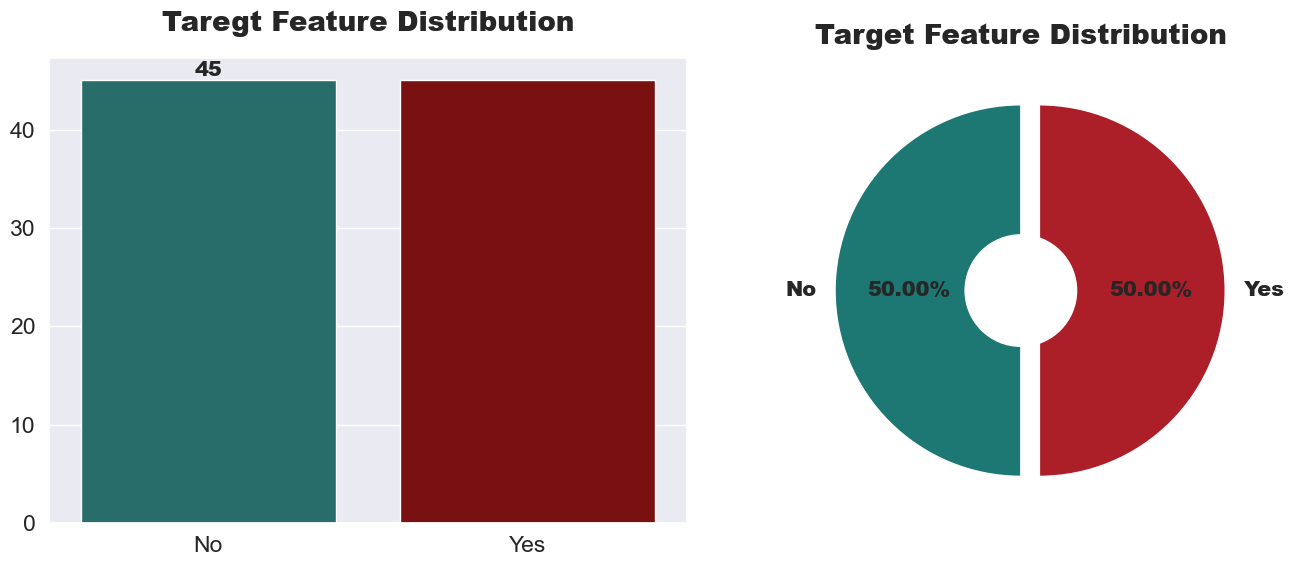

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.barplot(y=df["Target"].value_counts().values,x=["No","Yes"],palette=["#1d7874","#8B0000"])
plt.title("Taregt Feature Distribution",fontweight="black",size=20,pad=20)
ax.bar_label(ax.containers[0],fontweight="black",size=15)



plt.subplot(1,2,2)
plt.pie(df["Target"].value_counts().values, labels=["No","Yes"], autopct="%.2f%%", 
        textprops={"fontweight":"black","size":15}, colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Target Feature Distribution",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* The **class is highly balanced**, which indicates that we have **equal records of patinets** who have stones in their kidney and vice-versa.
* So we **don't** have to **use** any technique like **SMOTE.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 2. Visualizing Urnine_Gravity Feature Distribution & Relation.</div> 

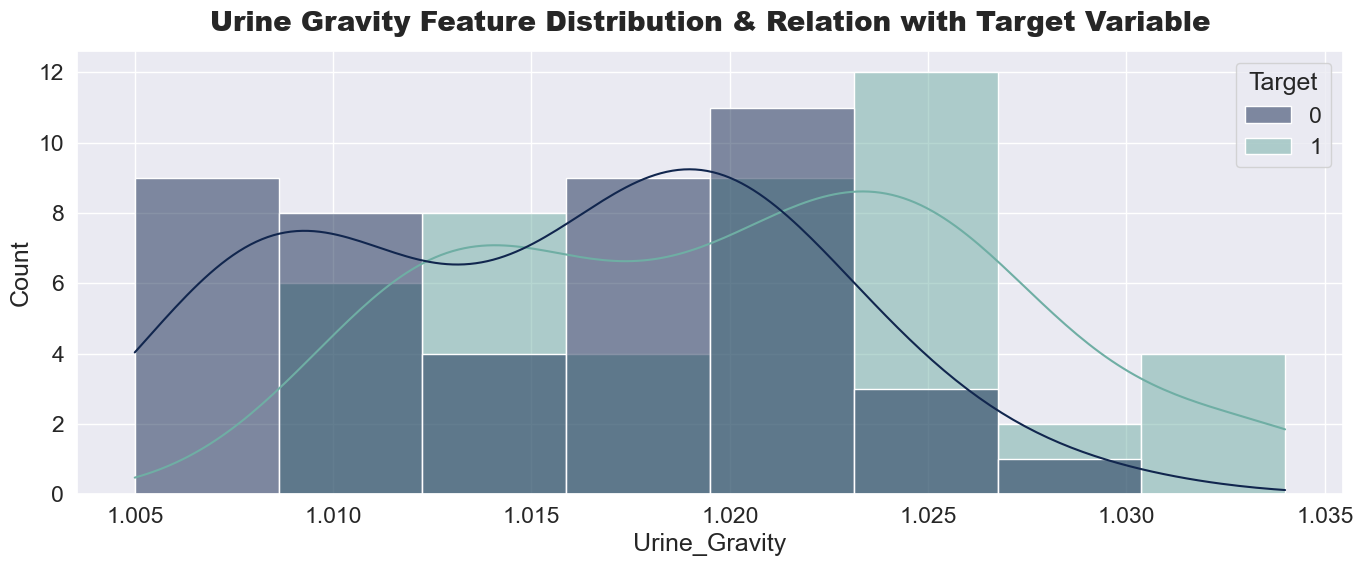

In [53]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urine_Gravity"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urine Gravity Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most of patient having stone in their kidney** are having high **Urine gravity** and vice-versa.
* So we can make an infernece that **with increase in Urine gravity value** their is **more likey to have stone in their kidney.**
* Hence, this **feature is essential for model-building.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 3. Visualizing Urine_pH Feature Distribution & Relation.</div> 

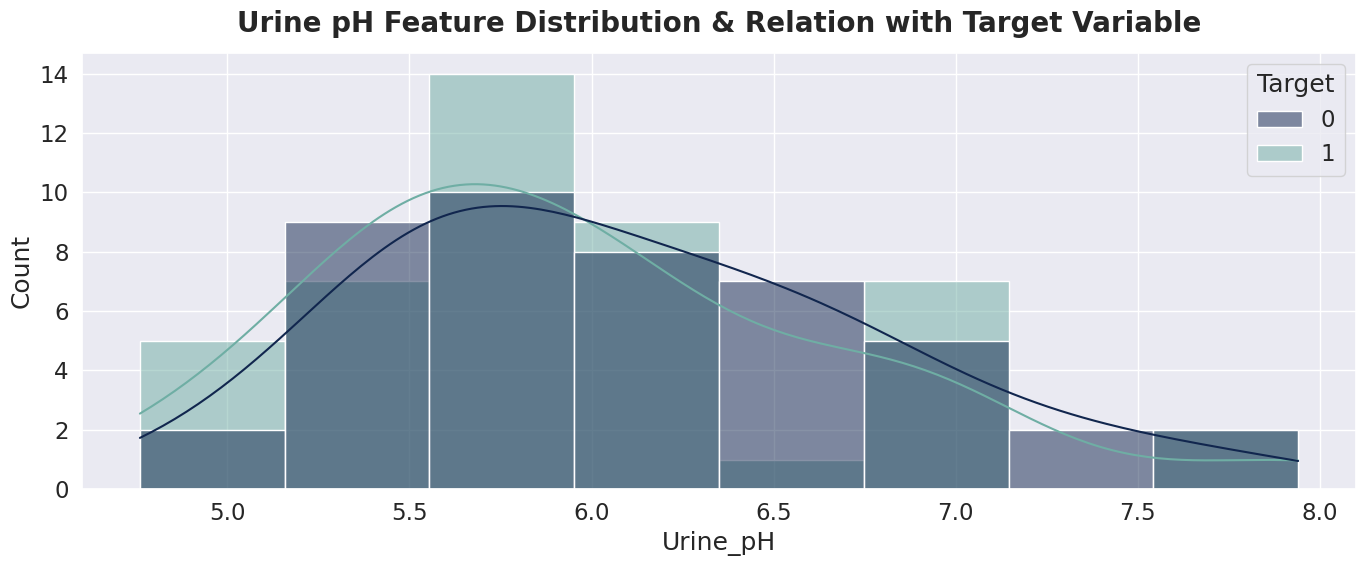

In [13]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urine_pH"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urine pH Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most of patient having stone in their kidney** are likely to have **pH value very low or equal to average pH value.**
* **Some of patient having high pH values** are also **suffereing from this disease.**
* So we **can't conclude any direct relation between pH and Target Variabels.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 4. Visualizing Osmolality Feature Distribution & Relation.</div> 

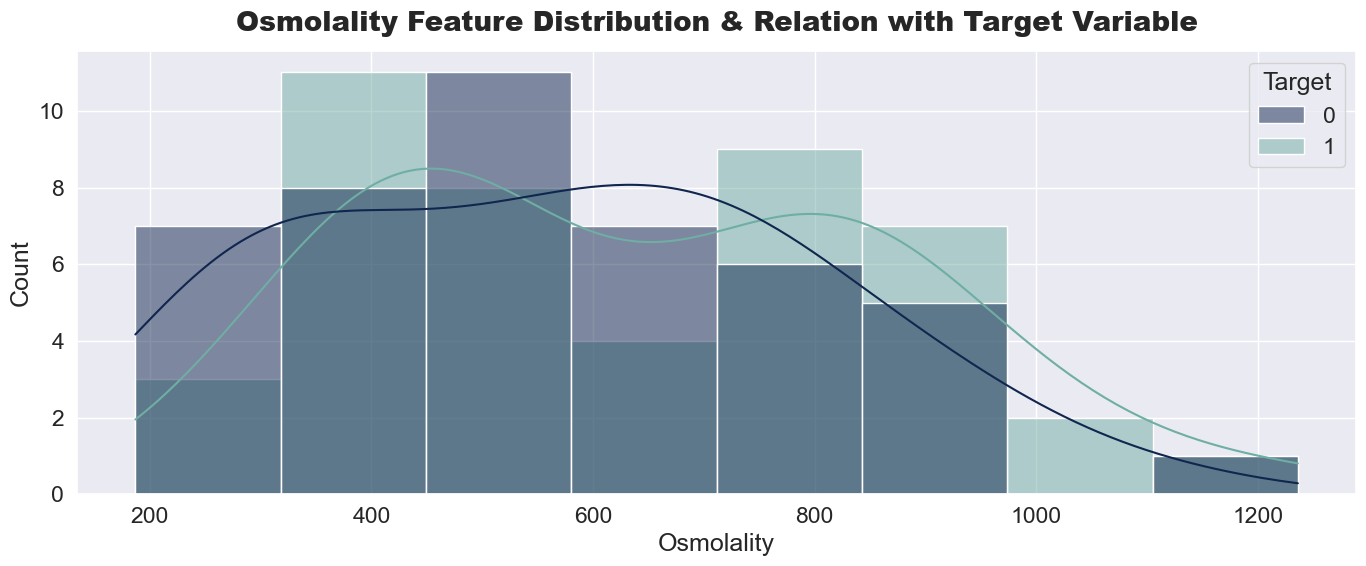

In [56]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Osmolality"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Osmolality Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most of patient having stone in their kidney** are likely to have **Osmolality value very low or very high.**
* **Patients having average osmolality value** are having **low chance of having stone in their kidney.**
* Hence, this **feature is essential for model-building.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 5. Visualizing Conductivity Feature Distribution & Relation.</div> 

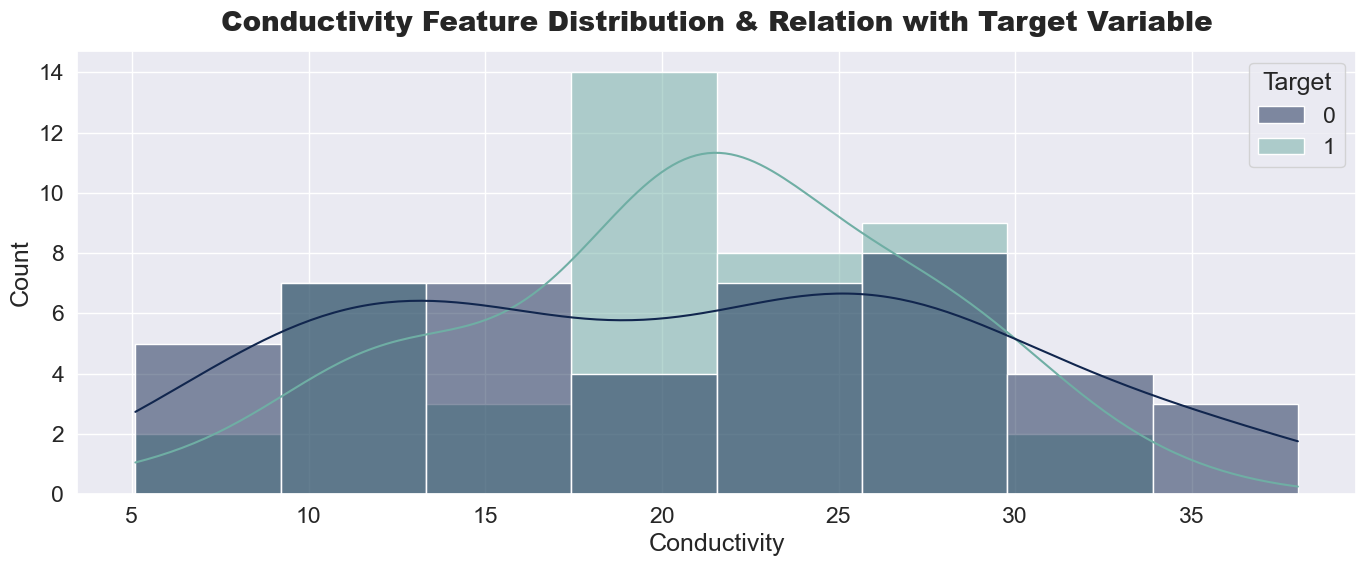

In [61]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Conductivity"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Conductivity Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most of the patient having stone in their kidney** are having **an avergae conductivity (ion level) value.**
* But some **patient having low ion level are also suffering from this disease.**
* So we **can't conclude that there is any kind of direct relation between conductivity and target features.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 6. Visualizing Urea Feature Distribution & Relation.</div> 

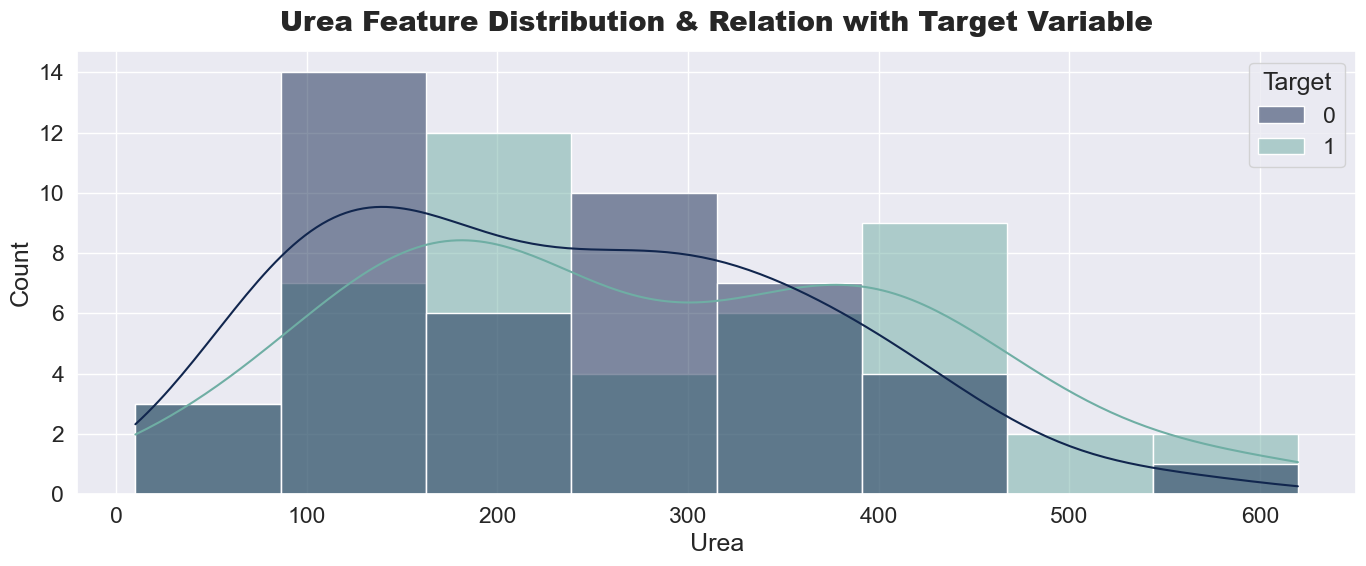

In [66]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urea"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urea Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most of the patient having stone in their kidney** are having **high urea values.**
* But some **patient having average or low Urea values** are also suffering from this disease.
* So we **can't conclude that there is any kind of direct relation between Urea and target features.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 7. Visualizing Calcium Feature Distribution & Relation.</div> 

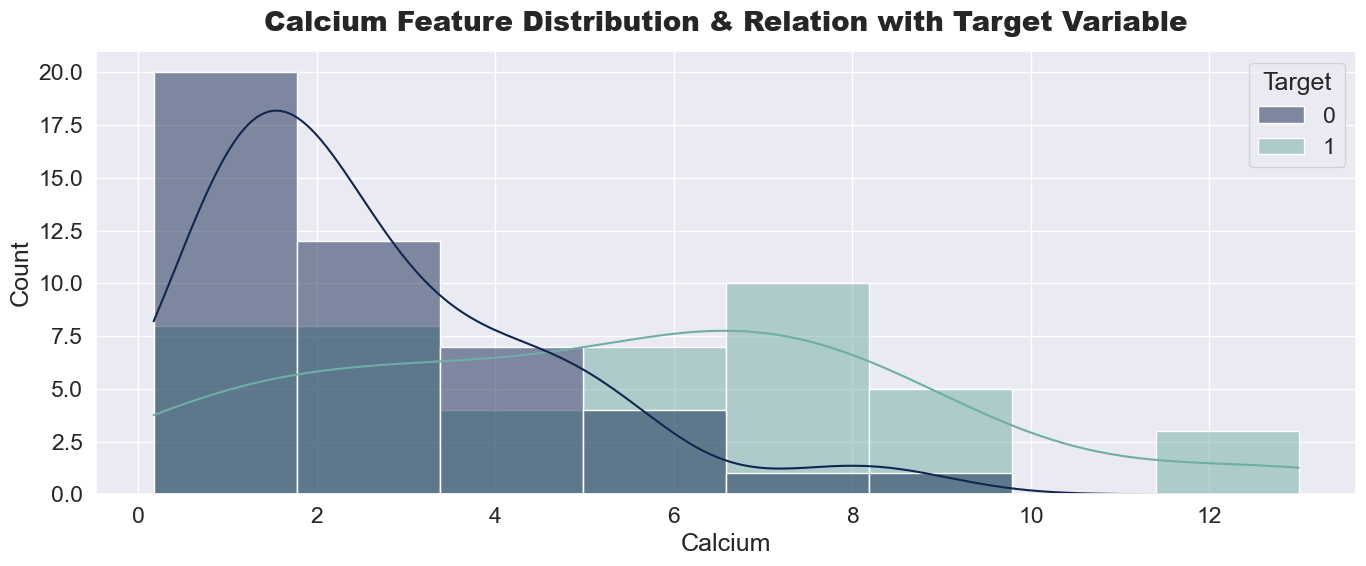

In [71]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["Calcium"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Calcium Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Most of the patient having stone in their kidney** are having **high calcium values.**
* so we can make an infernece that **with increase in calcium level** there is **more chance of patinet having stone in kidney.**
* Hence, this **feature is essential for model-building.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 8. Detecting Outliers in Independent variables.</div> 

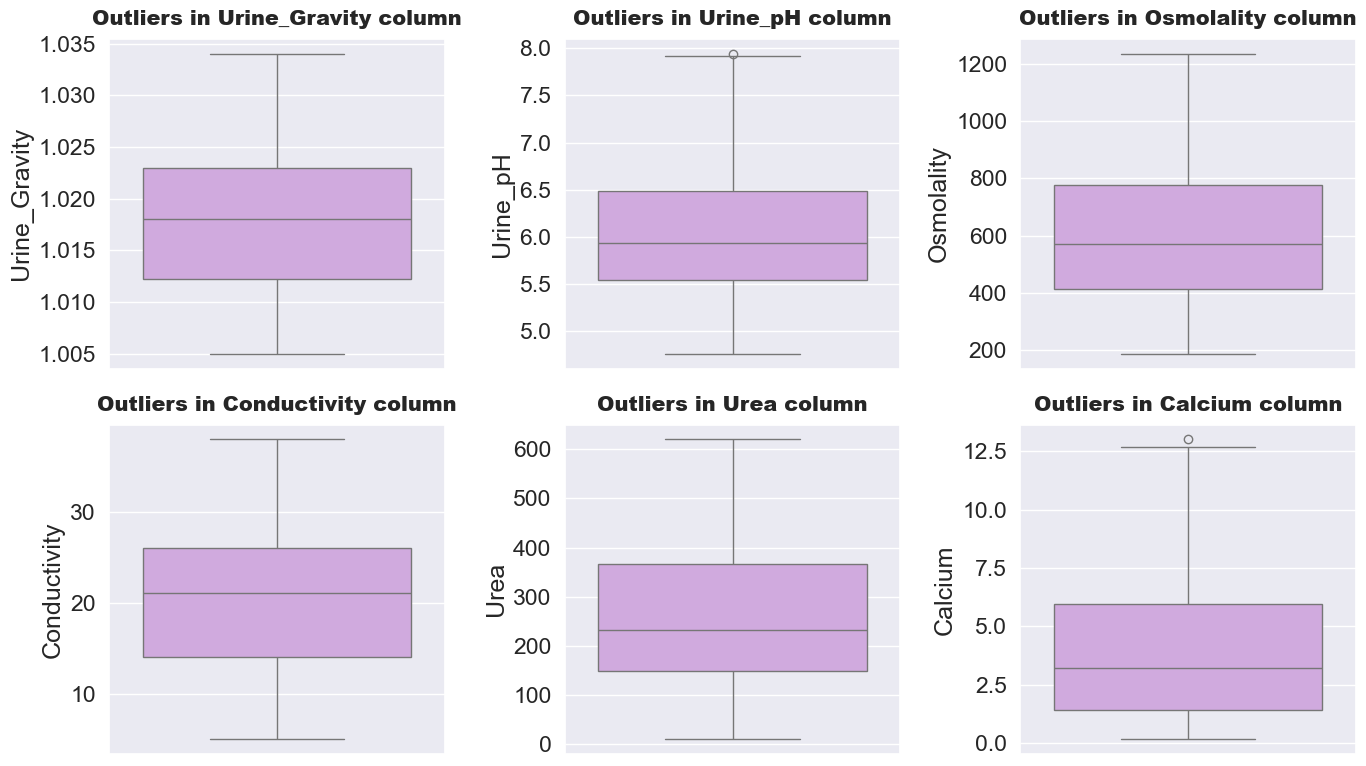

In [76]:
ind_cols = df.columns.tolist()
ind_cols.remove("Target")

plt.figure(figsize=(14,8))
for index,column in enumerate(ind_cols):
    plt.subplot(2,3,index+1)
    sns.boxplot(df[column],palette=["#D4A1E7"])
    plt.title(f"Outliers in {column} column",fontweight="black",size=15,pad=10)
    plt.tight_layout()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Urine_pH** & **Calcium** features are having **have some outlier values.**
* All the features are having **stable spread** becuase they **don't have any extemly high or extremely low values**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 9. Finidng Realtion between "Urine_Gravity w.r.t Other Features.</div> 

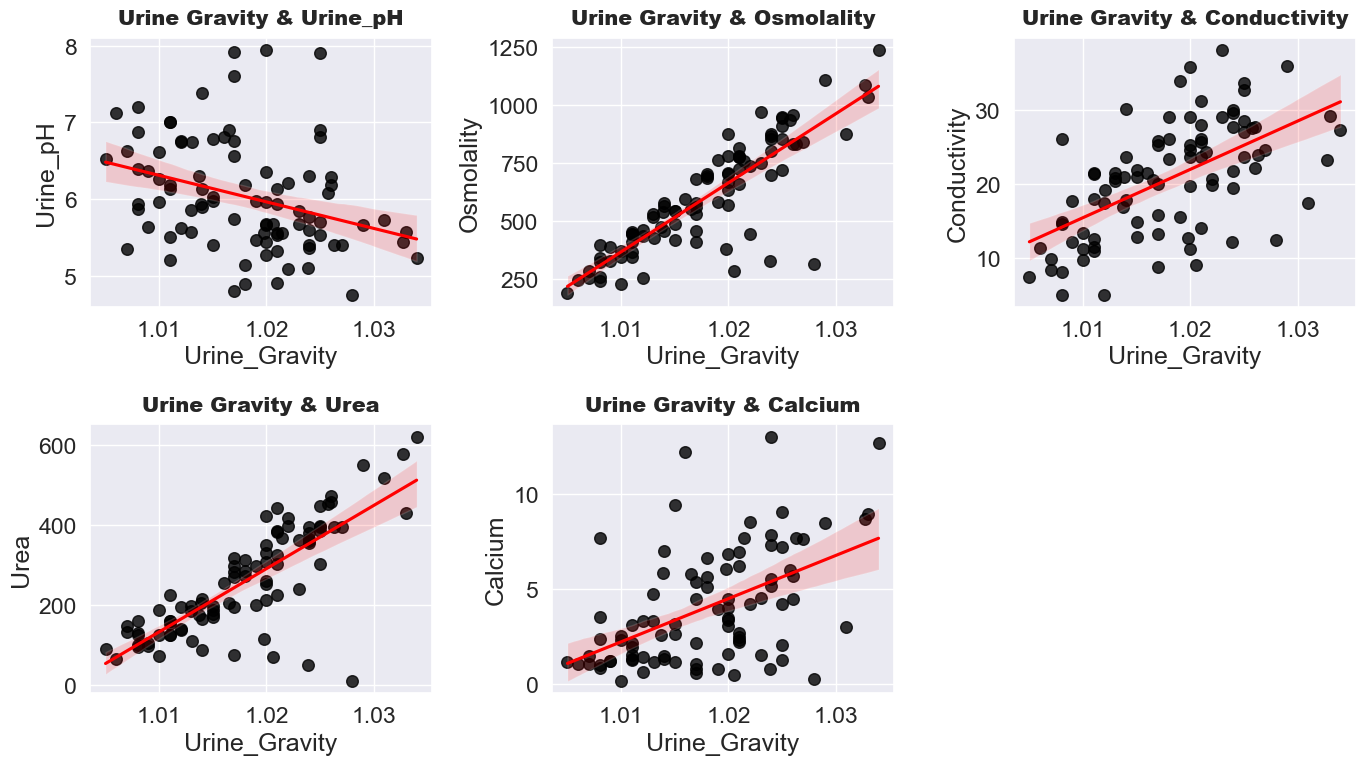

In [80]:
cols = df.columns.tolist()
cols.remove("Urine_Gravity")
cols.remove("Target")


plt.figure(figsize=(14,8))
for index,col in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(x="Urine_Gravity",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Urine Gravity & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Urea** & **Osmolality** feature are having **proper linear relation** with **Urine Gravity Feature.**
* With **increase in Urine Gravity the Urine PH decreases** so there's also a **linear relation among them.**
* Features like **Conductivity** & **Calcium** are showing **linear relation** among the features.
* So we can **conclude that Urine Gravity is an important feature which will help model in building patterns for better prediction.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 10. Finidng Realtion between Urine_PH w.r.t Other Features.</div> 

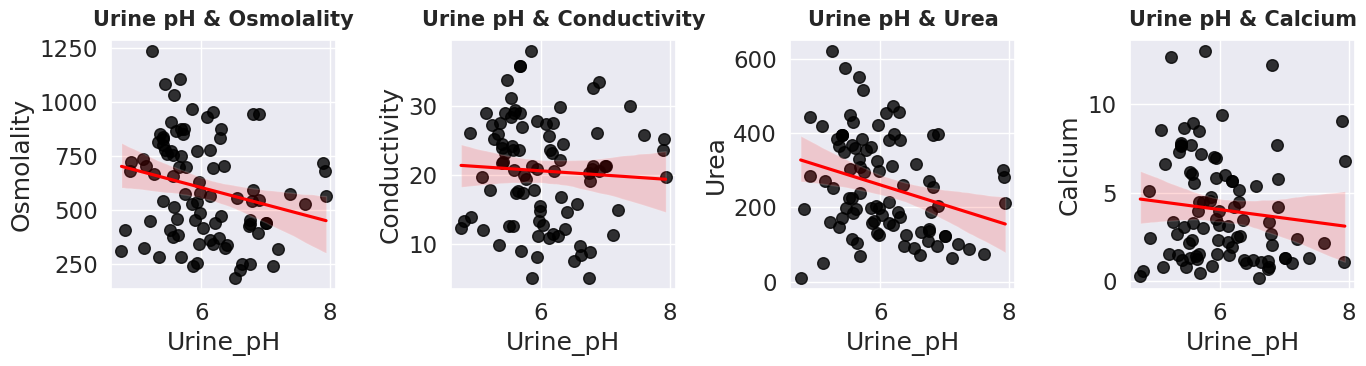

In [20]:
cols=["Osmolality","Conductivity","Urea","Calcium"]

plt.figure(figsize=(14,4))
for index,col in enumerate(cols):
    plt.subplot(1,4,index+1)
    sns.regplot(x="Urine_pH",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Urine pH & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Urine pH** feature is having **litte relation with feature Osmolality & Urea.**
* **Urine pH** is having **no relation** with **Conductivity** or **Calcium** features.**
* So **pH feature doesn't seem that much relevant for model-building.**
* Hence, we will perform **Feature Engineering to make it more relvant for model building.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 11. Finidng Realtion between Osmolality w.r.t Other Features.</div> 

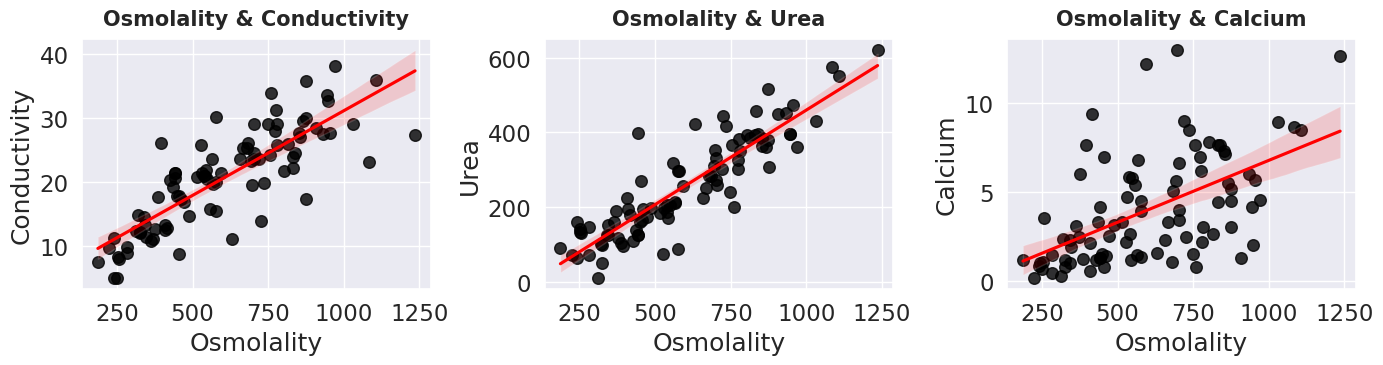

In [21]:
cols = ["Conductivity","Urea","Calcium"]

plt.figure(figsize=(14,4))
for index,col in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x="Osmolality",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Osmolality & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* **Osmolality** feature is having **strong linear relation** with **Conductivity, Urea, Calcium** features.
* So we can **conclude that Osmolality is an important feature which will help model in building patterns for better prediction.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 12. Finidng Realtion between Conductivity w.r.t Other Features.</div> 

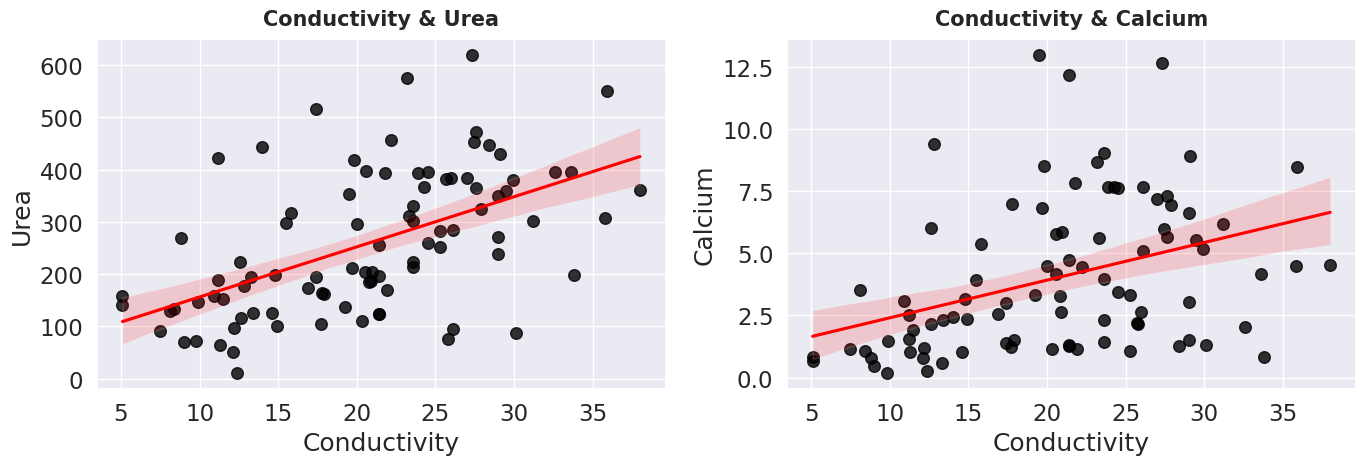

In [22]:
cols = ["Urea","Calcium"]

plt.figure(figsize=(14,5))
for index,col in enumerate(cols):
    plt.subplot(1,2,index+1)
    sns.regplot(x="Conductivity",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Conductivity & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

 
* **Conductivity** feature is having **little linear relation** with **Urea, Calcium** features.
* So we can **conclude that conductivity is an important feature which will help model in building patterns for better prediction.**

----

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 13. Finidng Realtion between Urea & Calcium Features.</div> 

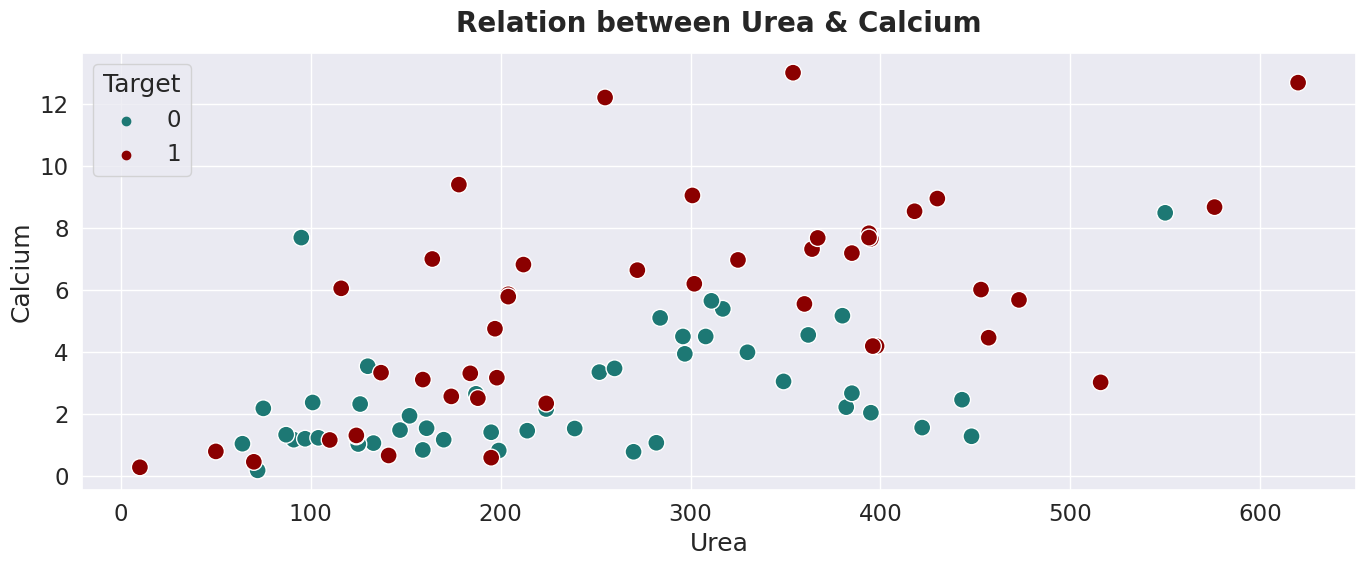

In [23]:
plt.figure(figsize=(14,6))
sns.scatterplot(x="Urea",y="Calcium",data=df,hue="Target", markers=["o", "s"], s=150,palette=["#1d7874","#8B0000"])
plt.title("Relation between Urea & Calcium",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* We can clearly observe that **with increase in Urea, Calcium also increases**.
* Patients having **high calcium values** are **more likey to have stone in their kidney.**
* So we can **conclude that Calcium & Urea is an important feature which will help model in building patterns for better prediction.**

---

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Note:</font></h3>

* From **above eda** we concluded that **Urine_pH** feature is **not that relevant** for **model-building.**
* So we can create a **new feature by creating bins to show Urine_pH scale**, **`Acidic`**, **`Neutral`**, **`Alkaline`**.

### 2. Create Bins using Urine Urine_pH column.

In [25]:
bin_edges = [4.70, 5.53652, 6.49, 7.94] 
bin_labels = ['Acidic', 'Neutral', 'Alkaline']


df['Urine_pH_bin'] = pd.cut(df['Urine_pH'], bins=bin_edges, labels=bin_labels)

In [26]:
df["Urine_pH_bin"].sample(5).to_frame()

,Urine_pH_bin
71,Acidic
63,Neutral
53,Neutral
73,Acidic
3,Acidic


### 3. Visualizing New Feature Urine_pH_bin w.r.t Target Variable.

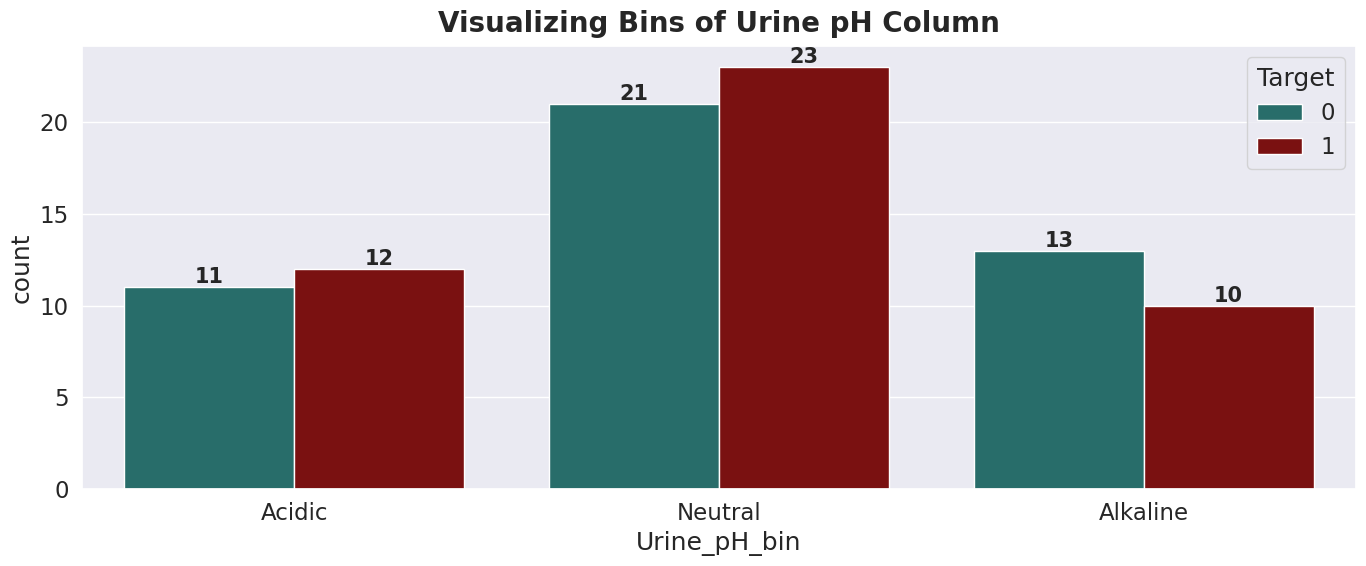

In [27]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x=df["Urine_pH_bin"],hue=df["Target"],palette=["#1d7874","#8B0000"])
ax.bar_label(ax.containers[0],fontweight="black",size=15)
ax.bar_label(ax.containers[1],fontweight="black",size=15)
plt.title("Visualizing Bins of Urine pH Column",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Both the **categories of target variable** are having **approxiamately equal patients**
* So from this new feature we can conclude that **Patinet having stone in their kidney may or may not depend on Urine_pH.**

----

----

In [30]:
contingency_table = pd.crosstab(df["Target"], df['Urine_pH_bin'])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("P-Value is:",p_value)

P-Value is: 0.7688604081605568


</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Since the **p-value is > 0.05** so we were **failed to reject the null hypothesis.**
* Hencce we can conclude that there is **no relation between those two features.**
* So the **new feature we created doesn't seem to be relevant with target feature.**

----

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⚙️ Data Preprocessing ⚙️</b></div>

----

### 2. Segregating Features & Labels for Model Training.

In [93]:
X = df.drop(columns=["Target"])
y = df["Target"]

---

In [25]:
X.shape

(90, 6)

### 3. Splitting Data For Model Training & Testing.

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (72, 6)
Shape of x_test is:  (18, 6)
Shape of y_train is: (72,)
Shape of y_test is:  (18,)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Data is **equally splitted** for **Model Training & Testing.**
* So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **kidney stone patients**</div>

----

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎯 Model Creation using DecisionTree 🎯</b></div>

In [97]:
clf = DecisionTreeClassifier()

In [99]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [101]:
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

In [103]:
accuracy_score(y_train,y_pred_train)

1.0

In [107]:
accuracy_score(y_test,y_pred_test)

0.6666666666666666

In [43]:
from sklearn import tree

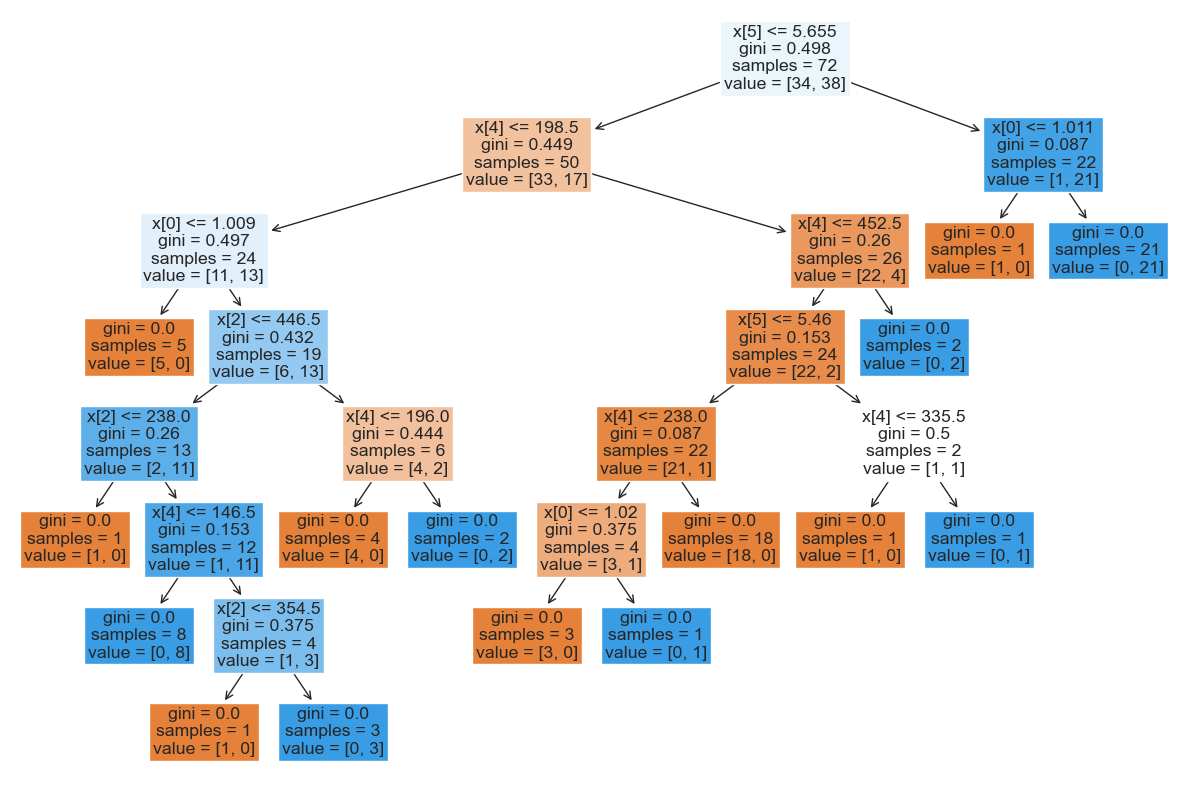

In [111]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [122]:
8*7*8*2*2*2*5

17920

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [117]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "random_state":[0,42]}

In [121]:
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1,verbose=1)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3584 candidates, totalling 17920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             verbose=1)

In [168]:
grid_search1=RandomizedSearchCV(clf, param_grid, cv=5, n_jobs=-1,verbose=1)
grid_search1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'random_state': [0, 42],
                                        'splitter': ['best', 'random']},
                   verbose=1)

In [170]:
b=grid_search1.best_params_
b

{'splitter': 'best',
 'random_state': 0,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_depth': 10,
 'criterion': 'gini'}

---

In [172]:
dtree2 = DecisionTreeClassifier(**b)

dtree2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=4,
                       random_state=0)

### 2. Fetching the Best Parameters for DecisionTree Model.

In [125]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'random'}

In [143]:
grid_search.cv_results_

{'mean_fit_time': array([0.00599585, 0.00759611, 0.00949826, ..., 0.00580754, 0.00599637,
        0.00619578]),
 'std_fit_time': array([0.00063249, 0.00257497, 0.00801595, ..., 0.00117195, 0.00126407,
        0.00074814]),
 'mean_score_time': array([0.00679593, 0.01269469, 0.00519853, ..., 0.0056025 , 0.0041976 ,
        0.00539589]),
 'std_score_time': array([0.00511129, 0.01031176, 0.00146972, ..., 0.00421739, 0.0007475 ,
        0.00249673]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 3, ..., 10, 10, 10],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 8, 8, 8],
              mask=[False, False, False, ..., False,

---

In [174]:
y_train_pred = dtree2.predict(x_train)
y_test_pred = dtree2.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 86.11 %
Accuracy Score of Model on Testing Data  is => 66.67 %


In [145]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005996,0.000632,0.006796,0.005111,gini,3,1,2,0,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.600000,0.714286,0.785714,0.785714,0.710476,0.071359,1690
1,0.007596,0.002575,0.012695,0.010312,gini,3,1,2,0,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.533333,0.666667,0.714286,0.714286,0.785714,0.682857,0.083874,2197
2,0.009498,0.008016,0.005199,0.001470,gini,3,1,2,42,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.600000,0.714286,0.785714,0.785714,0.710476,0.071359,1690
3,0.021999,0.022714,0.005996,0.002097,gini,3,1,2,42,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.533333,0.666667,0.785714,0.785714,0.428571,0.640000,0.140894,2906
4,0.008002,0.002662,0.007395,0.006339,gini,3,1,3,0,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.600000,0.714286,0.785714,0.785714,0.710476,0.071359,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0.007200,0.001285,0.005500,0.002231,entropy,10,8,7,42,random,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.466667,0.733333,0.500000,0.428571,0.428571,0.511429,0.114111,3473
3580,0.008400,0.004326,0.004197,0.000748,entropy,10,8,8,0,best,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.600000,0.600000,0.857143,0.714286,0.785714,0.711429,0.101579,1592
3581,0.005808,0.001172,0.005603,0.004217,entropy,10,8,8,0,random,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.666667,0.733333,0.642857,0.571429,0.785714,0.680000,0.073980,2364
3582,0.005996,0.001264,0.004198,0.000747,entropy,10,8,8,42,best,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.600000,0.600000,0.857143,0.785714,0.785714,0.725714,0.105907,1277


In [137]:
def xyz(**a):
    print(a)

xyz(a=1,b=2)

{'a': 1, 'b': 2}


### 3. Creating DecisionTree Model Using Best Parameters.

In [139]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0, splitter='random')

### 4. Computing Model Accuracy.

In [141]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 97.22 %
Accuracy Score of Model on Testing Data  is => 83.33 %


### 5. Model Evaluation using Different Metric Values.

In [67]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred))

F1 Score of the Model is => 0.8
Recall Score of the Model is => 0.8571428571428571
Precision Score of the Model is => 0.75


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Training accuracy is **97%** where as testing accuracy is **83%**. So we can say the model is overfit even after hyper-parameter tunning.
    
    
* We can observe that **recall, precision, and F1 score are near to 0.8**, it means that our** model is achievinga balanced fit between** correctly identifying **positive samples (recall)** and minimizing **false positives (precision).**

In [178]:
best_params_

NameError: name 'best_params_' is not defined

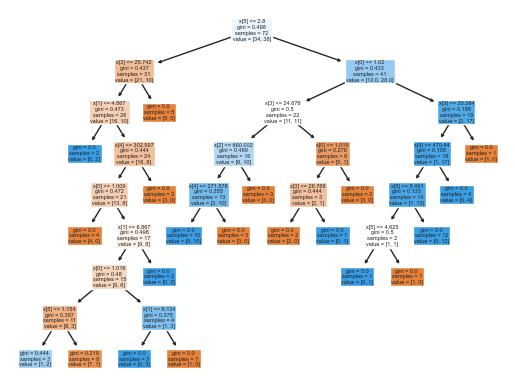

In [176]:
tree.plot_tree(dtree,filled=True)
plt.show()

---

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>


* The **model demonstrates strong performance** with an accuracy of **95% on training data and 88% on testing data**, indicating a solid fit to the dataset.

    
* Remarkably, the **model achieves consistent recall, precision, and F1 score values**, suggesting a perfect balance between effectively identifying positive cases and minimizing false positives.

    
* The pivotal **factors significantly impacting kidney stone patients** are identified as **`Calcium`**, **`Urine_Gravity`**, and **`Osmolality`**, underscoring their vital roles in predicting the presence of kidney stones.

    
* Conversely, **`Urine pH`** and **`Conductivity`** are found to have **minimal impact on distinguishing kidney stone patients**, suggesting these features may be less influential in the predictive process.

    
* **Overall, the model's accuracy, balanced metrics, and key feature insights collectively contribute to a comprehensive understanding of kidney stone prediction**, potentially aiding in early detection and better patient care.

----